# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [58]:
df = pd.read_csv('heart_failure_clinical_records_dataset_2.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [25]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,62.160182,0.371921,546.147783,0.359606,36.721675,0.293103,257376.302615,1.520382,136.032020,0.593596,0.253695,115.642857,0.500000
std,11.787047,0.483914,874.425214,0.480477,11.625807,0.455747,99103.965498,1.115536,4.406108,0.491768,0.435662,75.375066,0.500617
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,53.000000,0.000000,124.250000,0.000000,29.000000,0.000000,200520.139756,1.000000,134.000000,0.000000,0.000000,54.250000,0.000000
50%,60.809321,0.000000,262.500000,0.000000,35.000000,0.000000,262000.000000,1.200000,136.000000,1.000000,0.000000,96.500000,0.500000
75%,70.000000,1.000000,582.000000,1.000000,42.000000,1.000000,304619.162594,1.667743,139.000000,1.000000,1.000000,186.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [45]:
df_temp = df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']]
df_temp.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8


### Analyzing all the continuous values in the dataset.

<AxesSubplot:>

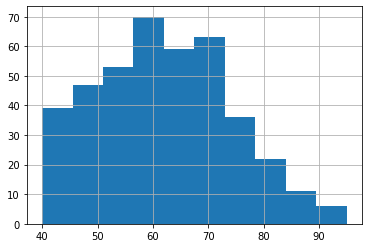

In [34]:
#features=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
df['age'].hist()
    

<AxesSubplot:>

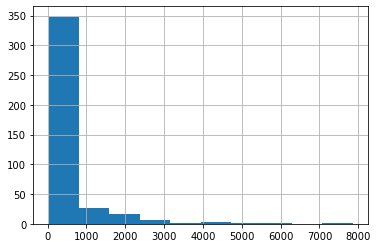

In [35]:
df['creatinine_phosphokinase'].hist()

<AxesSubplot:>

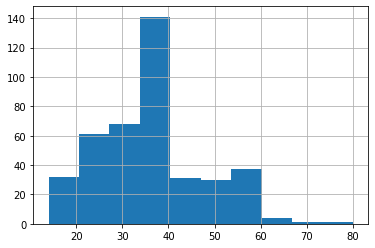

In [36]:
df['ejection_fraction'].hist()

<AxesSubplot:>

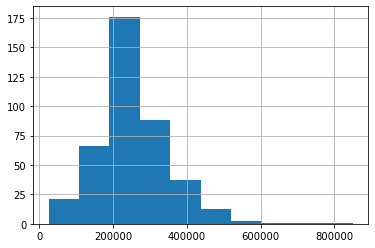

In [37]:
df['platelets'].hist()

<AxesSubplot:>

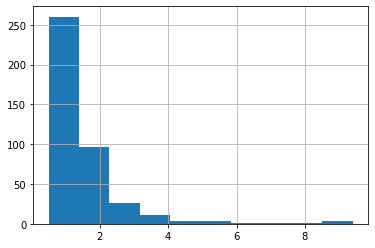

In [38]:
df['serum_creatinine'].hist()

<AxesSubplot:>

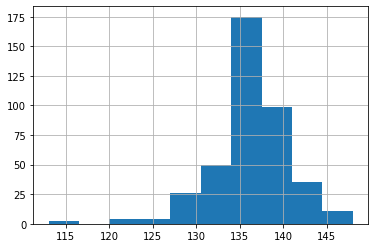

In [39]:
df['serum_sodium'].hist()

<AxesSubplot:>

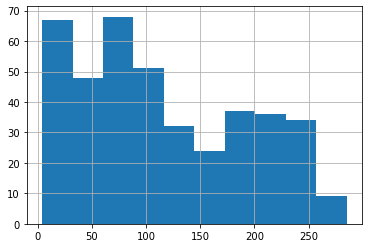

In [41]:
df['time'].hist()

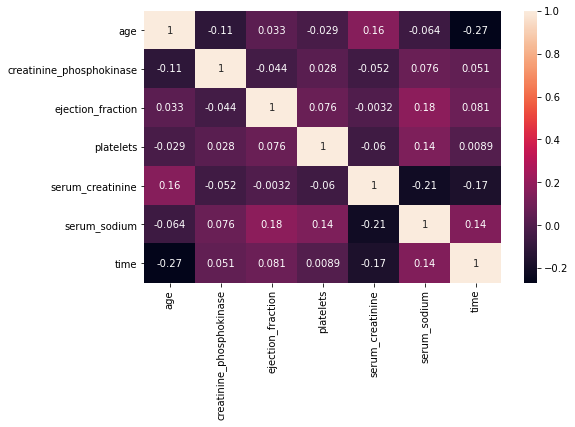

In [54]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['age','creatinine_phosphokinase','ejection_fraction','platelets',
                'serum_creatinine','serum_sodium','time']].corr(), annot=True)
plt.show()

### Analyzing categorical values in the dataset

Graph for anaemia: total = 2


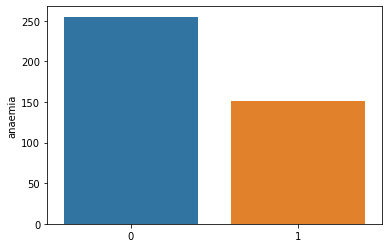

Graph for diabetes: total = 2


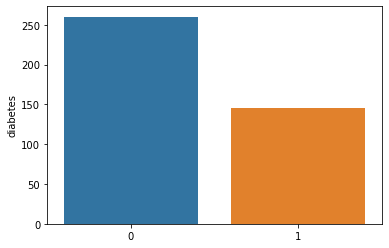

Graph for high_blood_pressure: total = 2


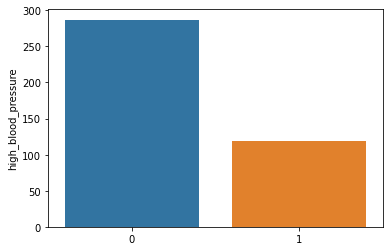

Graph for sex: total = 2


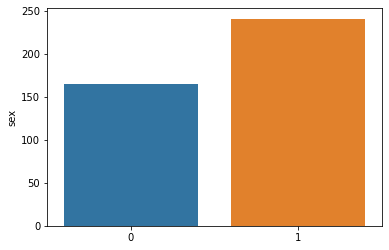

Graph for smoking: total = 2


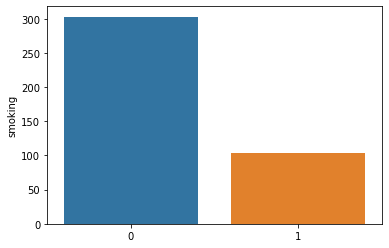

In [62]:
df_cat = df.drop(['age','creatinine_phosphokinase','ejection_fraction','platelets',
                'serum_creatinine','serum_sodium','time','DEATH_EVENT'],axis='columns')
for i in df_cat.columns:
    num = df_cat[i].value_counts()
    print("Graph for %s: total = %d"% (i,len(num)))
    sns.barplot(x=num.index,y=num)
    plt.show()

In [63]:
df.smoking.value_counts()

0    303
1    103
Name: smoking, dtype: int64

In [64]:
pd.pivot_table(df, index='smoking', values='DEATH_EVENT')

,DEATH_EVENT
smoking,
0,0.547855
1,0.359223
